Lecture02.

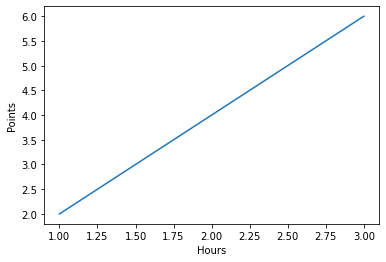

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

plt.plot(x_data, y_data)
plt.xlabel('Hours')
plt.ylabel('Points')
plt.show()

In [ ]:
w = 1.0

# x를 입력으로 받는 우리의 모델
def forward(x): # y_pred = x*w
  return x*w

def loss(x,y):
  y_pred = forward(x)
  return (y_pred-y)**2

In [ ]:
for w in np.arange(0.0, 4.1, 0.1):
  print('w = ', w)
  l_sum = 0
  for x_val, y_val in zip(x_data, y_data):
    y_pred_val = forward(x_val)
    l = loss(x_val, y_val)
    l_sum += l
    print('\t', x_val, y_val, y_pred_val, l)

  print('MSE = ', l_sum/3) # MSE니까 데이터가 3개 일때 3으로 나눔

w =  0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE =  18.666666666666668
w =  0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE =  16.846666666666668
w =  0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE =  15.120000000000003
w =  0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE =  13.486666666666665
w =  0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE =  11.946666666666667
w =  0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE =  10.5
w =  0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE =  9.146666666666663
w =  0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2

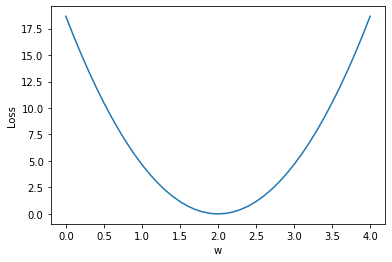

In [ ]:
w_list = []
mse_list = []

for w in np.arange(0.0,4.1,0.1):
  l_sum = 0
  for x_val, y_val in zip(x_data, y_data):
    y_pred_val = forward(x_val)
    l = loss(x_val, y_val)
    l_sum += l
  w_list.append(w)
  mse_list.append(l_sum/3)

plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

Exercise 2-1

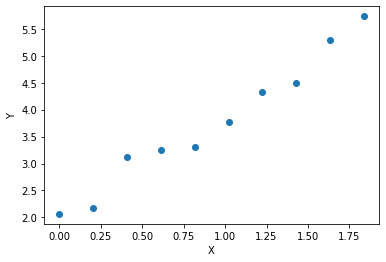

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 임의의 데이터
x_data = [0, 0.204081633, 0.408163265, 0.612244898, 0.816326531, 1.020408163,
          1.224489796, 1.428571429, 1.632653061, 1.836734694]
y_data = [2.064980716, 2.180084184, 3.11649903, 3.251961744, 3.313814195,
          3.773538537, 4.328553494, 4.494099566, 5.282628422, 5.732555286]

plt.scatter(x_data, y_data)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

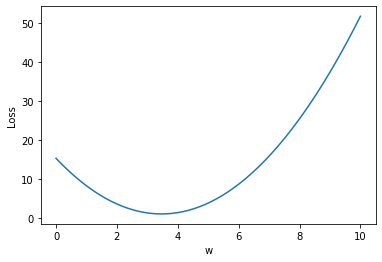

MSE 값이 최소로 되는 지점의 가중치 w:  3.5


In [16]:
w = 1.0

# x를 입력으로 받는 우리의 모델
def forward(x): # y_pred = x*w
  return x*w

def loss(x,y):
  y_pred = forward(x)
  return (y_pred-y)**2

w_list = []
mse_list = []

for w in np.arange(0.0,10.1,0.1):
  l_sum = 0
  for x_val, y_val in zip(x_data, y_data):
    y_pred_val = forward(x_val)
    l = loss(x_val, y_val)
    l_sum += l
  w_list.append(w)
  mse_list.append(l_sum/len(x_data))

# 가중치 w에 따른 MSE(Loss) 값 그래프
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

print('MSE 값이 최소로 되는 지점의 가중치 w: ', w_list[np.argmin(mse_list)])

Lecture03.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

w = 1.0

def forward(x): # y_pred = x*w
  return x*w

def loss(x,y):
  y_pred = forward(x)
  return (y_pred-y)**2

# loss(x,y)를 w에 대해 미분한 것
def gradient(x,y):
  return 2*x*(x*w-y)

print('predict (before training)', 4, forward(4))

for epoch in range(100):
  for x_val, y_val in zip(x_data, y_data):
    grad = gradient(x_val, y_val)
    w = w - 0.01*grad
    print('\tgrad: ', x_val, y_val, grad)
    l = loss(x_val, y_val)

  print('progress: ', epoch, 'w = ', w, 'loss = ', l)

print('predict (after training)', '4 hours', forward(4))

predict (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.2288
progress:  0 w =  1.260688 loss =  4.919240100095999
	grad:  1.0 2.0 -1.478624
	grad:  2.0 4.0 -5.796206079999999
	grad:  3.0 6.0 -11.998146585599997
progress:  1 w =  1.453417766656 loss =  2.688769240265834
	grad:  1.0 2.0 -1.093164466688
	grad:  2.0 4.0 -4.285204709416961
	grad:  3.0 6.0 -8.87037374849311
progress:  2 w =  1.5959051959019805 loss =  1.4696334962911515
	grad:  1.0 2.0 -0.8081896081960389
	grad:  2.0 4.0 -3.1681032641284723
	grad:  3.0 6.0 -6.557973756745939
progress:  3 w =  1.701247862192685 loss =  0.8032755585999681
	grad:  1.0 2.0 -0.59750427561463
	grad:  2.0 4.0 -2.3422167604093502
	grad:  3.0 6.0 -4.848388694047353
progress:  4 w =  1.7791289594933983 loss =  0.43905614881022015
	grad:  1.0 2.0 -0.44174208101320334
	grad:  2.0 4.0 -1.7316289575717576
	grad:  3.0 6.0 -3.584471942173538
progress:  5 w =  1.836707389300983 loss =  0.2399802903801062
	grad:  1.0 2.0

Exercise 3-1.

In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

w1 = 1.0
w2 = 1.0
b = 1.0

def forward(x): # y_pred = x*w
  return (x**2)*w2 + x*w1 + b

def loss(x,y):
  y_pred = forward(x)
  return (y_pred-y)**2

# loss(x,y)를 w에 대해 미분한 것
def gradient1(x,y):
  return 2*x*(w2*(x**2)+x*w1-y+b)

def gradient2(x,y):
  return 2*(x**2)*(w2*(x**2)+w1*x-y+b)

print('predict (before training)', 4, forward(4))

for epoch in range(100):
  for x_val, y_val in zip(x_data, y_data):
    grad1 = gradient1(x_val, y_val)
    grad2 = gradient2(x_val, y_val)
    w1 = w1 - 0.01*grad1
    w2 = w2 - 0.01*grad2
    print('\tgrad1: ', x_val, y_val, grad1)
    print('\tgrad2: ', x_val, y_val, grad2)
    l = loss(x_val, y_val)

  print('\nprogress: ', epoch, 'w1 = ', w1, 'w2 = ', w2, 'loss = ', l)

print('\npredict (after training)', '4 hours', forward(4))

predict (before training) 4 21.0
	grad1:  1.0 2.0 2.0
	grad2:  1.0 2.0 2.0
	grad1:  2.0 4.0 11.52
	grad2:  2.0 4.0 23.04
	grad1:  3.0 6.0 26.04480000000001
	grad2:  3.0 6.0 78.13440000000003

progress:  0 w1 =  0.6043519999999999 w2 =  -0.031744000000000216 loss =  12.059228569600016
	grad1:  1.0 2.0 -0.8547840000000004
	grad2:  1.0 2.0 -0.8547840000000004
	grad1:  2.0 4.0 -7.467939840000003
	grad2:  2.0 4.0 -14.935879680000006
	grad1:  3.0 6.0 -10.81079132160001
	grad2:  3.0 6.0 -32.43237396480003

progress:  1 w1 =  0.795687151616 w2 =  0.4504863764480001 loss =  2.0777459377632366
	grad1:  1.0 2.0 0.4923470561280001
	grad2:  1.0 2.0 0.4923470561280001
	grad1:  2.0 4.0 1.455115942625282
	grad2:  2.0 4.0 2.910231885250564
	grad1:  3.0 6.0 6.460697089159993
	grad2:  3.0 6.0 19.38209126747998

progress:  2 w1 =  0.7116055507368673 w2 =  0.22263967435941467 loss =  0.7420552333845415
	grad1:  1.0 2.0 -0.13150954980743634
	grad2:  1.0 2.0 -0.13150954980743634
	grad1:  2.0 4.0 -2.713358512